In [16]:
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, scale, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.decomposition import PCA

In [19]:
def get_R2_features(model, test = True):
  features = list(X)
  features.remove('three')

  R_2_train = []
  R_2_test = []

  for feature in features:
    model.fit(X_train[[feature]], y_train)

    R_2_train.append(model.score(X_train[[feature]], y_train))
    R_2_test.append(model.score(X_test[[feature]], y_test))

  plt.bar(features, R_2_train, label = "Train")
  plt.bar(features, R_2_test, label = "Test")
  plt.xticks(rotation = 90)
  plt.ylabel('$R^2$')
  plt.legend()
  plt.show()
  print("Training R^2 mean value : {} \n Testing R^2 mean value : {}".format(str(np.mean(R_2_train)), str(np.mean(R_2_test))))
  print("Training R^2 max value : {} \n Testing R^2 max value : {}".format(str(np.max(R_2_train)), str(np.max(R_2_test))))


In [20]:
def plot_coef(X,model,name=None):
    
    plt.bar(X.columns[2:],abs(model.coef_[2:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, y_train))
    print("R^2 on testing data ",model.score(X_test,y_test))

In [21]:
def plot_dis(y, yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist = False, color= 'r', label = 'Actual Values')
    sns.distplot(yhat, hist = False, color= 'b', ax = ax1, label= "Fitted Value")
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [22]:
data = pd.read_csv("datasets/encoded_car_data.csv")
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [24]:
X = data.drop('price', axis = 1)
y = data.price

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 42)
print("Number of training samples: ", X_train.shape[0])
print("Number of testing samples :", X_test.shape[0])

Number of training samples:  184
Number of testing samples : 21


In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

predicted = lm.predict(X_test)

print("R^2 on training data:", lm.score(X_train, y_train))
print("R^2 on testing data :", lm.score(X_test, y_test))

R^2 on training data: 0.9092101381197338
R^2 on testing data : 0.947249925032153


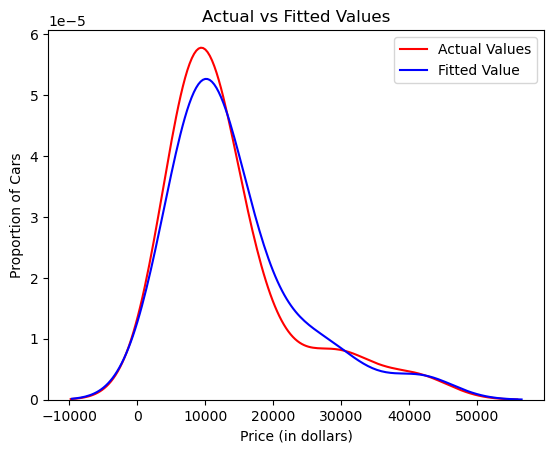

In [27]:
plot_dis(y_test, predicted)

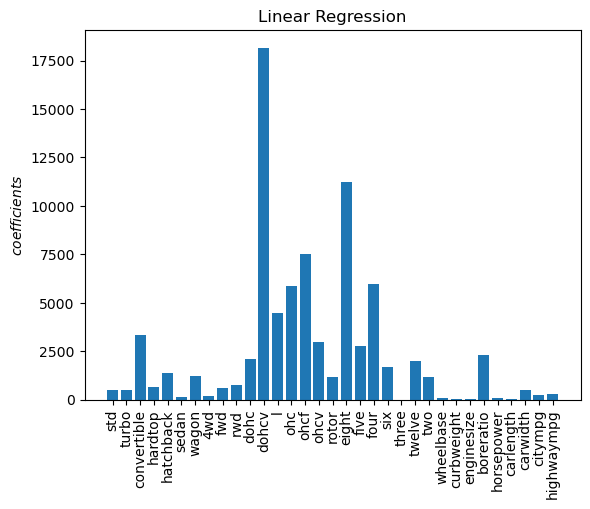

R^2 on training  data  0.9092101381197338
R^2 on testing data  0.947249925032153


In [28]:
plot_coef(X,lm,name="Linear Regression")

In [29]:
rr = Ridge(alpha= 0.01)

rr.fit(X_train, y_train)
predicted_rr = rr.predict(X_test)

print("R^2 on training data : ", rr.score(X_train, y_train))
print("R^2 on testing data : ", rr.score(X_test, y_test))

R^2 on training data :  0.9091956531801181
R^2 on testing data :  0.9478784615596499


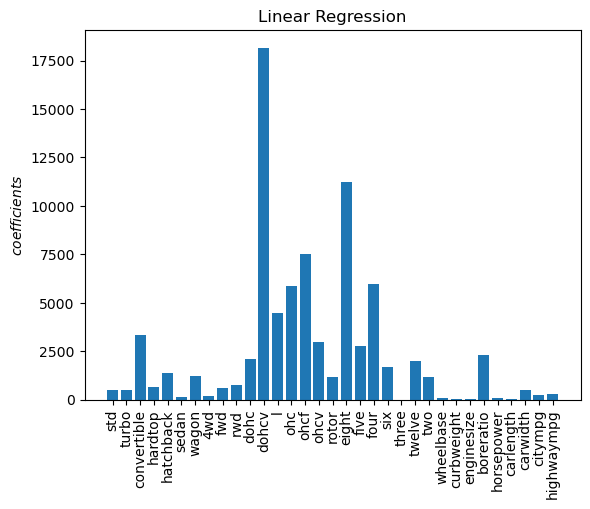

R^2 on training  data  0.9092101381197338
R^2 on testing data  0.947249925032153


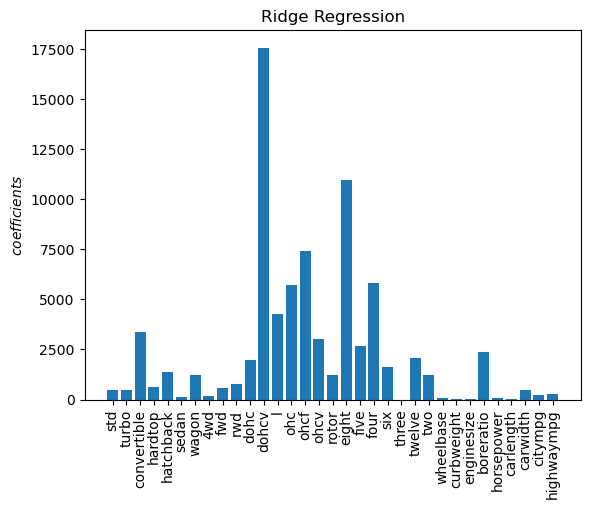

R^2 on training  data  0.9091956531801181
R^2 on testing data  0.9478784615596499


In [30]:
plot_coef(X, lm, name = "Linear Regression")
plot_coef(X, rr, name = "Ridge Regression")

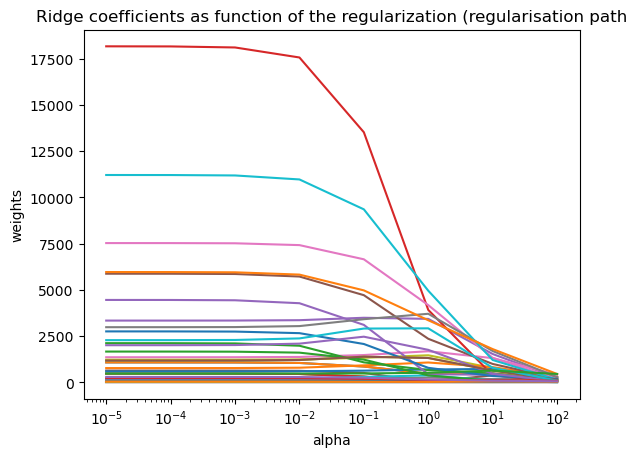

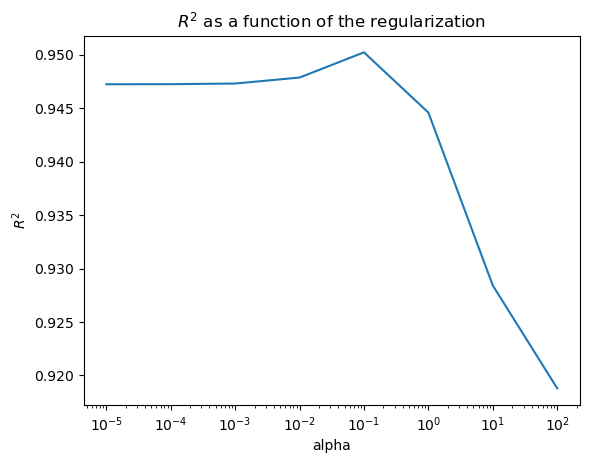

In [32]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

R_2 = []
coef = []

for alpha in alphas:
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_train, y_train)
    coef.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test, y_test))

ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as function of the regularization (regularisation path')
plt.show()

ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.title("$R^2$ as a function of the regularization")
plt.show()

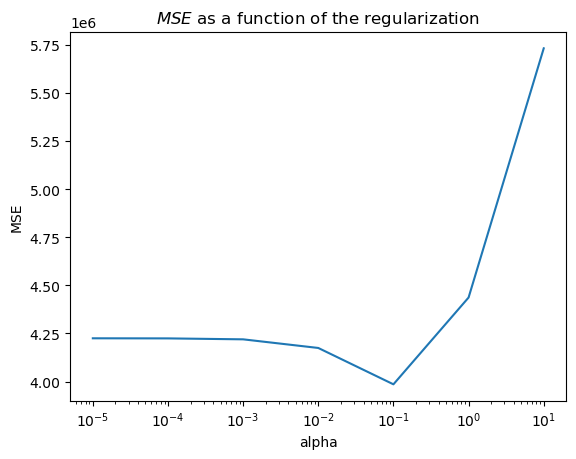

In [33]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
MEAN_SQE=[]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    MEAN_SQE.append(mean_squared_error(ridge.predict(X_test),y_test))

ax = plt.gca()
ax.plot(alphas, MEAN_SQE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("$MSE$ as a function of the regularization")
plt.show()